# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

c:\Users\carlo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [4]:
data.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2

## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [5]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, 
                                       train_size=0.8, 
                                       test_size=0.2,
                                       random_state=42
                                      )


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404, 1), (102, 1))

## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [6]:
# He elegido como modelo de regresion el Random Forest.
from sklearn.ensemble import RandomForestRegressor as RFR

rf = RFR()                      # inicia el modelo

rf.fit(X_train, y_train)        # entrena el modelo. Para el training set

rf.fit(X_test, y_test)          # entrena el modelo. Para el testing set

y_pred = rf.predict(X_test)     # prediccion.
y_pred2 = rf.predict(X_train)    # prediccion.

C:\Users\carlo\AppData\Local\Temp\ipykernel_20076\1768994243.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)        # entrena el modelo. Para el training set
C:\Users\carlo\AppData\Local\Temp\ipykernel_20076\1768994243.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_test, y_test)          # entrena el modelo. Para el testing set


## 3. Calculate and print R-squared for both the training and the testing set.

In [15]:
from sklearn.metrics import r2_score as r2

r2(y_test, y_pred), r2(y_train, y_pred2)

(0.9711292752214952, 0.8232747435132385)

## 4. Calculate and print mean squared error for both the training and the testing set.

In [16]:
from sklearn.metrics import mean_squared_error as mse

mse(y_test, y_pred), mse(y_train, y_pred2)

(2.1171994705882353, 15.35272457425743)

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [17]:
from sklearn.metrics import mean_absolute_error as mae

mae(y_test, y_pred), mae(y_train, y_pred2)

(0.8964117647058824, 2.8790148514851497)

## Classification Model Evaluation

In [18]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

In [19]:
data.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   class  
0      0  
1      0  
2      0  
3      0  
4      0

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [23]:
from sklearn.model_selection import train_test_split as tts

X_train, X_test, y_train, y_test = tts(X, y, 
                                       train_size=0.8, 
                                       test_size=0.2,
                                       random_state=42
                                      )


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [26]:
from sklearn.linear_model import LogisticRegression as LogReg
import warnings
warnings.filterwarnings("ignore")

logreg = LogReg()

logreg.fit(X_train, y_train)

y_pred_logreg_train=logreg.predict(X_train) 


y_pred_logreg=logreg.predict(X_test) 

y_prob=logreg.predict_proba(X_test)

y_prob_train=logreg.predict_proba(X_train) 



y_pred_logreg[:2], y_prob[:2]

(array([1, 0]),
 array([[3.78408728e-03, 8.27215142e-01, 1.69000771e-01],
        [9.46721874e-01, 5.32779264e-02, 1.99990375e-07]]))

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [28]:
logreg.score(X_train, y_train), logreg.score(X_test, y_test)

(0.975, 1.0)

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [29]:
from sklearn.metrics import accuracy_score as acc

acc(y_train, y_pred_logreg_train), acc(y_test, y_pred_logreg)

(0.975, 1.0)

## 10. Calculate and print the precision score for both the training and the testing set.

In [32]:
from sklearn.metrics import precision_score as prec

prec(y_train, y_pred_logreg_train, average  = 'weighted'), prec(y_test, y_pred_logreg, average  = 'weighted')

# 'weighted' indica que se calcula la precision_score ponderada, lo que significa que se tienen en cuenta las etiquetas desequilibradas al calcular el score.

(0.9767857142857144, 1.0)

## 11. Calculate and print the recall score for both the training and the testing set.

In [36]:
from sklearn.metrics import recall_score as rec

rec(y_train, y_pred_logreg_train, average  = 'weighted'), rec(y_test, y_pred_logreg, average  = 'weighted')

(0.975, 1.0)

## 12. Calculate and print the F1 score for both the training and the testing set.

In [37]:
from sklearn.metrics import f1_score as f1

f1(y_train, y_pred_logreg_train, average  = 'weighted'), f1(y_test, y_pred_logreg, average  = 'weighted')

(0.9749882794186592, 1.0)

## 13. Generate confusion matrices for both the training and the testing set.

In [38]:
from sklearn.metrics import confusion_matrix as cm

cm(y_train, y_pred_logreg_train)

array([[40,  0,  0],
       [ 0, 38,  3],
       [ 0,  0, 39]], dtype=int64)

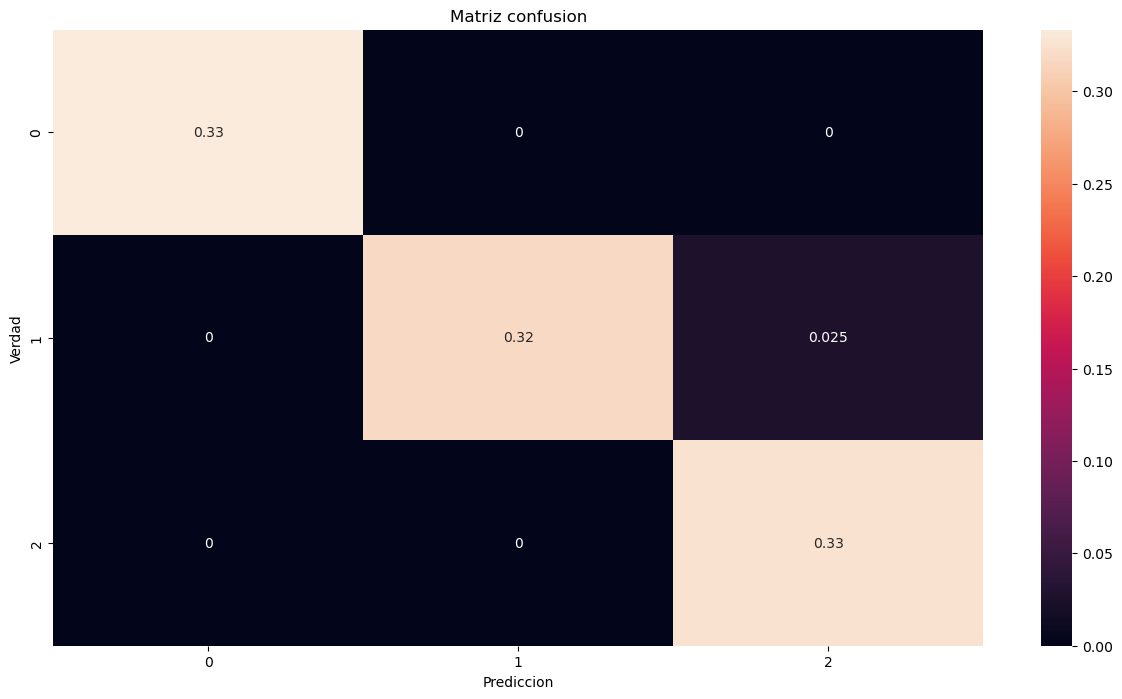

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_train, y_pred_logreg_train)/cm(y_train, y_pred_logreg_train).sum(), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

In [39]:
cm(y_test, y_pred_logreg)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

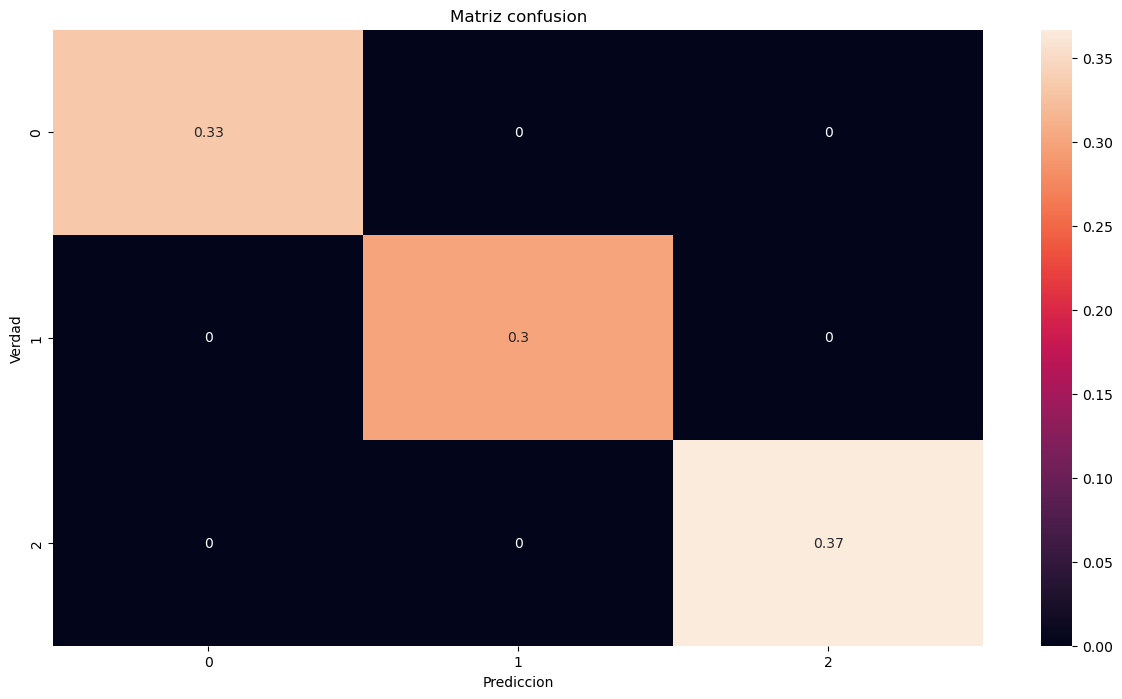

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(15, 8))

ax=sns.heatmap(cm(y_test, y_pred_logreg)/cm(y_test, y_pred_logreg).sum(), annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.